In [1]:
#### Load the libraries 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_rows", None, "display.max_columns", None)

### Read in the data

In [2]:
# data from Australian team

sydney = pd.read_excel('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\\Sydney and Melbourne deals - July 2021.xlsx'
                       , 'Sydney deals') # Sydney sheet

melbourne = pd.read_excel('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\\Sydney and Melbourne deals - July 2021.xlsx'
                       , 'Melbourne CBD deals') # Melbourne sheet

In [3]:
#sydney.head()

In [4]:
# remove non-columns from the datasets
sydney = sydney.loc[:,~sydney.columns.str.contains('Unnamed')] 
melbourne = melbourne.loc[:,~melbourne.columns.str.contains('Unnamed')] 

In [5]:
# compare column names, Sale Date vs Date
sydney.columns
melbourne.columns

Index(['Grade', 'Prime/Secondary', 'Sold (%)', 'Sale Date', 'Building Name',
       'Address', 'Suburb', 'Market', 'Postcode', 'States', 'Price', 'Area',
       '$/m²', 'Core Market Yield', 'Passing Yield', 'Purchaser', 'WALE',
       'Occupancy', 'NABERS Energy rating (Base Building) Current rating',
       'Current Expiry', 'NABERS at time of Sale', 'Floors', 'Year Built',
       'Year refurbished'],
      dtype='object')

Index(['Grade', 'Prime/Secondary', 'Sold (%)', 'Date', 'Address', 'Suburb',
       'Market', 'Postcode', 'States', 'Price', 'Area', '$/m²', 'WALE',
       'Occupancy', 'NABERS at time of Sale', 'Floors', 'Year Built',
       'Year refurbished'],
      dtype='object')

In [6]:
melbourne=melbourne.rename(columns = {'Date':'Sale Date'}) # rename

In [7]:
df = sydney.append(melbourne, ignore_index=True) # combine the two dfs

In [8]:
# look at Market and Suburb. we'll need another column for city
df['Address'].groupby(df['Market']).agg(['count'])
df['Address'].groupby(df['Suburb']).agg(['count'])

,count
Market,
CBD,258
Fringe,12
North Shore,58
Parramatta,30
Suburban,1


,count
Suburb,
Alexandria,1
Chatswood,7
Chippendale,1
Docklands,7
Eveleigh,1
Kensington,1
Macquarie Park,11
Mascot,1
Melbourne,43


In [9]:
# create City column
sydney['City'] = 'Sydney'
melbourne['City'] = 'Melbourne'

In [10]:
df = sydney.append(melbourne, ignore_index=True) # combine the two dfs again

In [11]:
# only keep these columns
df = df[['Grade', 'Prime/Secondary', 'Sold (%)', 'Sale Date', 'Address', 'City',
       'Suburb', 'Market', 'Postcode', 'States', 'Price', 'Area', '$/m²',
       'WALE', 'Occupancy', 'NABERS at time of Sale', 'Floors', 'Year Built',
       'Year refurbished']]

### Scrape the building coordinates

- the below section scrape Google Maps to get building coordinates based on Address Postcode and Suburb
- having run it through once, I've commented them out, not to do this over again
- due to the pause between loop iterations, the loop runs for around 6sec * ~350 observations = ~ 35 minutes

In [12]:
# get selenium
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.common.exceptions import NoSuchElementException, TimeoutException # Exceptions
# import time

#### Initiate the browser, and remove the terms and agreements pop up

In [13]:
# chrome_browser = webdriver.Chrome(executable_path=r"C:\Users\Sleptcom\Script\chromedriver.exe") # instantiate the browser

# # we will just go to this first random google maps link in order to "click" on the Agree button, after which we can proceed to the loop
# link ='https://www.google.com/maps/place/34+Hunter+St,+Sydney+NSW+2000,+Australia'
# # navigate to the link
# chrome_browser.get(link)
# # wait a bit
# time.sleep(5)
# #chrome_browser.switch_to_frame(0) # this ended up being unnecessary, but before you needed it
# chrome_browser.find_element(By.XPATH,'/html/body/c-wiz/div/div/div/div[2]/div[1]/div[4]/form/div[1]/div/button').click() # finds anf click button
# chrome_browser.switch_to.default_content()

#### Loop through addresses and get coordinates

In [ ]:
# df['Address_scrape'] =  df['Address'].replace(' ', '+')

# #staring the loop
# for index, row in df.iterrows():
#     #print(df.head(10))
#     try:
#         #create link from the address and typical link structure
#         link ='https://www.google.com/maps/search/' + row['Address_scrape'] + '+' + row['Suburb'] + '+' + str(row['Postcode']) + '+' + row['States']
        
#         # navigate to the link
#         chrome_browser.get(link)
        
#         # give time to load + avoid recognition of robotic page access
#         time.sleep(6)
        
#         url = chrome_browser.current_url
        
#         #print(url.index('@'))
#         #print(url.index('z/'))
#         both_coords = url[url.index('@-')+2:url.index('17z/')-1] # grabs both coords with a comma in between
        
#         # split based on a comma and put into a new var
#         df.at[index, 'lat'] = both_coords[:both_coords.index(',')] 
#         df.at[index, 'long'] = both_coords[both_coords.index(',')+1:]
        
#         print(index)
    
#     except NoSuchElementException:
#         continue
#     except TimeoutException:
#         continue
#     except:
#         continue
        
# df.to_csv('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\\df_coords.csv', index=False)

In [ ]:
# instead of running the loop, open the file saved at the end of the loop

df = pd.read_csv('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\\df_coords.csv')

### Working with the vars

In [15]:
df

,Grade,Prime/Secondary,Sold (%),Sale Date,Address,City,Suburb,Market,Postcode,States,Price,Area,$/m²,WALE,Occupancy,NABERS at time of Sale,Floors,Year Built,Year refurbished,Address_scrape,lat,long
0,B,Secondary,1.0000,2007-02-01,34 Hunter Street,Sydney,Sydney,CBD,2000,NSW,41.000000,5435.000000,7544.000000,1.80,0.700000,Not rated,12,1960,NaN,34 Hunter Street,33.865406,151.2084265
1,B,Secondary,1.0000,2007-03-01,91 York Street,Sydney,Sydney,CBD,2000,NSW,20.195000,5567.000000,3627.000000,2.90,0.990000,Not rated,13,1988,NaN,91 York Street,33.8697848,151.2058274
2,B,Secondary,1.0000,2007-06-01,89 York Street,Sydney,Sydney,CBD,2000,NSW,24.000000,5624.000000,4267.000000,1.20,0.910000,Not rated,12,1970,NaN,89 York Street,33.8696481,151.2059185
3,B,Secondary,1.0000,2007-08-01,99 Elizabeth Street,Sydney,Sydney,CBD,2000,NSW,76.500000,8447.000000,9027.000000,1.40,0.950000,Not rated,18,1969,NaN,99 Elizabeth Street,33.8693169,151.2101317
4,B,Secondary,1.0000,2007-10-01,10 Barrack Street,Sydney,Sydney,CBD,2000,NSW,82.500000,9556.000000,8633.000000,3.80,1.000000,Not rated,12,1986,2016,10 Barrack Street,33.8673789,151.2062462
5,B,Secondary,1.0000,2008-12-01,541 Kent St,Sydney,Sydney,CBD,2000,NSW,12.600000,2811.000000,4482.000000,1.13,0.700000,Not rated,8,1991,NaN,541 Kent St,33.8757317,151.2052883
6,B,Secondary,1.0000,2008-12-01,66 Clarence Street,Sydney,Sydney,CBD,2000,NSW,60.000000,9607.000000,6245.000000,4.70,0.730000,Not rated,12,1991,NaN,66 Clarence Street,33.8668344,151.20519
7,B,Secondary,1.0000,2009-01-01,44 Martin Place,Sydney,Sydney,CBD,2000,NSW,81.000000,10250.200000,7902.000000,9.60,1.000000,Not rated,11,1938,2010,44 Martin Place,33.8673204,151.2095557
8,B,Secondary,1.0000,2009-05-14,50 Margaret St,Sydney,Sydney,CBD,2000,NSW,40.500000,8722.300000,4643.000000,2.20,0.963000,Not rated,14,1975,2004,50 Margaret St,33.8648546,151.2061489
9,B,Secondary,1.0000,2009-07-17,343 George St,Sydney,Sydney,CBD,2000,NSW,55.000000,10001.100000,5449.000000,3.40,0.877000,3.5,11,1925,1986,343 George St,33.8674332,151.2067622


In [16]:
df.head()

,Grade,Prime/Secondary,Sold (%),Sale Date,Address,City,Suburb,Market,Postcode,States,Price,Area,$/m²,WALE,Occupancy,NABERS at time of Sale,Floors,Year Built,Year refurbished,Address_scrape,lat,long
0,B,Secondary,1.0,2007-02-01,34 Hunter Street,Sydney,Sydney,CBD,2000,NSW,41.000,5435.0,7544.0,1.8,0.70,Not rated,12,1960,NaN,34 Hunter Street,33.865406,151.2084265
1,B,Secondary,1.0,2007-03-01,91 York Street,Sydney,Sydney,CBD,2000,NSW,20.195,5567.0,3627.0,2.9,0.99,Not rated,13,1988,NaN,91 York Street,33.8697848,151.2058274
2,B,Secondary,1.0,2007-06-01,89 York Street,Sydney,Sydney,CBD,2000,NSW,24.000,5624.0,4267.0,1.2,0.91,Not rated,12,1970,NaN,89 York Street,33.8696481,151.2059185
3,B,Secondary,1.0,2007-08-01,99 Elizabeth Street,Sydney,Sydney,CBD,2000,NSW,76.500,8447.0,9027.0,1.4,0.95,Not rated,18,1969,NaN,99 Elizabeth Street,33.8693169,151.2101317
4,B,Secondary,1.0,2007-10-01,10 Barrack Street,Sydney,Sydney,CBD,2000,NSW,82.500,9556.0,8633.0,3.8,1.00,Not rated,12,1986,2016,10 Barrack Street,33.8673789,151.2062462


In [17]:
df.dtypes

Grade                             object
Prime/Secondary                   object
Sold (%)                         float64
Sale Date                 datetime64[ns]
Address                           object
City                              object
Suburb                            object
Market                            object
Postcode                           int64
States                            object
Price                            float64
Area                             float64
$/m²                             float64
WALE                             float64
Occupancy                        float64
NABERS at time of Sale            object
Floors                             int64
Year Built                         int64
Year refurbished                  object
Address_scrape                    object
lat                               object
long                              object
dtype: object

#### Age

In [18]:
df['Address'].groupby(df['Year refurbished']).agg(['count'])

,count
Year refurbished,
1981,2
1982,1
1985.0,1
1986,2
1989.0,1
1990,1
1991,1
1993,2
1995,5


In [19]:
df['Year refurbished'] = df['Year refurbished'].replace('demolshed for metro ', np.NaN)

In [20]:
df['Address'].groupby(df['Year refurbished']).agg(['count'])

,count
Year refurbished,
1981.0,2
1982.0,1
1985.0,1
1986.0,2
1989.0,1
1990.0,1
1991.0,1
1993.0,2
1995.0,5


In [21]:
df['Sale Year'] = pd.DatetimeIndex(df['Sale Date']).year # get year of sale date

df['Age'] = np.where(df['Sale Year'] >= df['Year refurbished'], 
                     df['Sale Year'] - df['Year refurbished'] + 1 , 
                     df['Sale Year'] - df['Year Built'] + 1 )  


df = df[df['Age']>0] # keep only positive age

#### Quality

In [22]:
# check the quality types and their breakdown
df['Address'].groupby(df['Grade']).agg(['count'])
df['Address'].groupby(df['Prime/Secondary']).agg(['count'])

pd.crosstab(index=df['Grade'], columns = df['Prime/Secondary'])

,count
Grade,
A,141
B,175
C,4
D,1
Premium,19


,count
Prime/Secondary,
Prime,161
Secondary,179


Prime/Secondary,Prime,Secondary
Grade,,
A,141,0
B,1,174
C,0,4
D,0,1
Premium,19,0


In [23]:
from pandas.api.types import CategoricalDtype

# encode grade
grade_category = CategoricalDtype(categories=['D', 'C', 'B', 'A', 'Premium'], ordered=True)
df['Grade_cat'] = df['Grade'].astype(grade_category)

# encode Prime/Secondary
grade_category2 = CategoricalDtype(categories=['Secondary', 'Prime'], ordered=True)
df['Grade_cat2'] = df['Prime/Secondary'].astype(grade_category2)

In [24]:
df.describe()

,Sold (%),Postcode,Price,Area,$/m²,WALE,Occupancy,Floors,Year Built,Year refurbished,Sale Year,Age
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,237.000000,340.000000,340.000000
mean,0.897742,2184.455882,156.006829,19120.251237,9689.186775,4.364618,0.932052,17.173529,1980.361765,2008.970464,2015.258824,16.044118
std,0.220118,358.274883,171.912384,16810.612762,5071.664181,3.478983,0.141241,11.121581,26.079100,7.862374,3.144140,16.085533
min,0.150000,2000.000000,10.200000,1151.000000,2123.000000,0.000000,0.000000,2.000000,1876.000000,1981.000000,2007.000000,1.000000
25%,1.000000,2000.000000,46.425000,7126.750000,5838.000000,2.500000,0.920000,10.000000,1973.000000,2005.000000,2013.000000,6.000000
50%,1.000000,2000.000000,95.500000,13646.000000,8248.320250,3.350000,0.982500,14.000000,1987.000000,2010.000000,2015.000000,11.000000
75%,1.000000,2113.000000,204.625000,25353.000000,12419.581624,5.000000,1.000000,22.000000,1992.000000,2015.000000,2018.000000,22.250000
max,1.000000,3008.000000,1520.000000,85516.000000,27482.459130,33.000000,1.000000,64.000000,2018.000000,2020.000000,2021.000000,130.000000


#### Market - Suburb

In [25]:
# look at various counts and cross-tabs to understand what's where

df['Address'].groupby(df['Market']).agg(['count'])
df['Address'].groupby(df['Suburb']).agg(['count'])
df['Address'].groupby(df['States']).agg(['count'])

pd.crosstab(index=df['Suburb'], columns = df['Market'])
pd.crosstab(index=df['States'], columns = df['City'])
pd.crosstab(index=df['Suburb'], columns = df['States'])

# very low count in some suburbs

,count
Market,
CBD,243
Fringe,11
North Shore,56
Parramatta,29
Suburban,1


,count
Suburb,
Alexandria,1
Chatswood,7
Chippendale,1
Docklands,6
Eveleigh,1
Kensington,1
Macquarie Park,11
Mascot,1
Melbourne,40


,count
States,
MSW,1
NSW,285
VIC,54


Market,CBD,Fringe,North Shore,Parramatta,Suburban
Suburb,,,,,
Alexandria,0,1,0,0,0
Chatswood,0,0,7,0,0
Chippendale,0,1,0,0,0
Docklands,6,0,0,0,0
Eveleigh,0,1,0,0,0
Kensington,0,1,0,0,0
Macquarie Park,0,0,11,0,0
Mascot,0,1,0,0,0
Melbourne,40,0,0,0,0


City,Melbourne,Sydney
States,,
MSW,0,1
NSW,0,285
VIC,54,0


States,MSW,NSW,VIC
Suburb,,,
Alexandria,0,1,0
Chatswood,0,7,0
Chippendale,0,1,0
Docklands,0,0,6
Eveleigh,0,1,0
Kensington,0,1,0
Macquarie Park,0,11,0
Mascot,0,1,0
Melbourne,0,0,40


In [26]:
melbourne['Address'].groupby(melbourne['Market']).agg(['count']) 

# The only Market in Melbourne is CBD.it's tricky - should we separate Melbourne CBD and Sydney CBD?
# for now I'll encode City and Marekt

,count
Market,
CBD,58


In [27]:
# creating categories for City and Marekt
df['City_cat'] = df["City"].astype("category")
df['Market_cat'] = df["Market"].astype("category")

#### NABERS rating

In [28]:
df = df.rename(columns = {'NABERS at time of Sale':'NABERS'}) # rename

In [29]:
df['Address'].groupby(df['NABERS']).agg(['count'])

,count
NABERS,
0,1
1,2
1.5,5
2,18
2.5,8
3,19
3.5,42
4,50
4.5,56


In [30]:
df['NABERS'] = df['NABERS'].replace('Not Rated', 'Not rated')
df['NABERS'] = df['NABERS'].replace('Not rated', 0)
df['Address'].groupby(df['NABERS']).agg(['count'])

,count
NABERS,
0.0,57
1.0,2
1.5,5
2.0,18
2.5,8
3.0,19
3.5,42
4.0,50
4.5,56


- we have to decide how to group NABERS
- is 0 and not rated the same?
- Option 1: use as continous. I would not use it as categorical as is (with half scores), because some of the grades and half grades have very few obs
- Option 2: group to into "whole" numbers, like 1 and 1.5, 2 and 2.5 etc. However, there's only one 6. Plus, half grades beyond three already have sufficient observations
- Option 3: group the grades more broadly based on this https://www.nabers.gov.au/about/what-nabers or on this "There are enough transactions with NABERS ratings in the range from 3 – 5 as these are the most common scores but few buildings have the very top ratings of 5.5 or 6.0 or the bottom ratings under 3.0 so we will not have 60+ transactions the top and bottom ends of the scale" - so it would be "under 3", "3 to 5", "above 5"

In [31]:
# Category verion 1
df['NABERS_cat1'] = df['NABERS'].replace(dict.fromkeys([1,1.5], 1))
df['NABERS_cat1'] = df['NABERS_cat1'].replace(dict.fromkeys([2,2.5], 2))
df['NABERS_cat1'] = df['NABERS_cat1'].replace(dict.fromkeys([3,3.5], 3))
df['NABERS_cat1'] = df['NABERS_cat1'].replace(dict.fromkeys([4,4.5], 4))
df['NABERS_cat1'] = df['NABERS_cat1'].replace(dict.fromkeys([5,5.5,6], 5))

# Category version 2

df['NABERS_cat2'] = df['NABERS'].replace(dict.fromkeys([1,1.5,2,2.5], 1))
df['NABERS_cat2'] = df['NABERS_cat2'].replace(dict.fromkeys([3,3.5,4,4.5], 2))
df['NABERS_cat2'] = df['NABERS_cat2'].replace(dict.fromkeys([5.5,6], 3))

In [32]:
df['NABERS_cat1'] = df['NABERS_cat1'].astype("category")
df['NABERS_cat2'] = df['NABERS_cat2'].astype("category")

In [33]:
#df['NABERS_cat1']

#### Visualising the vars

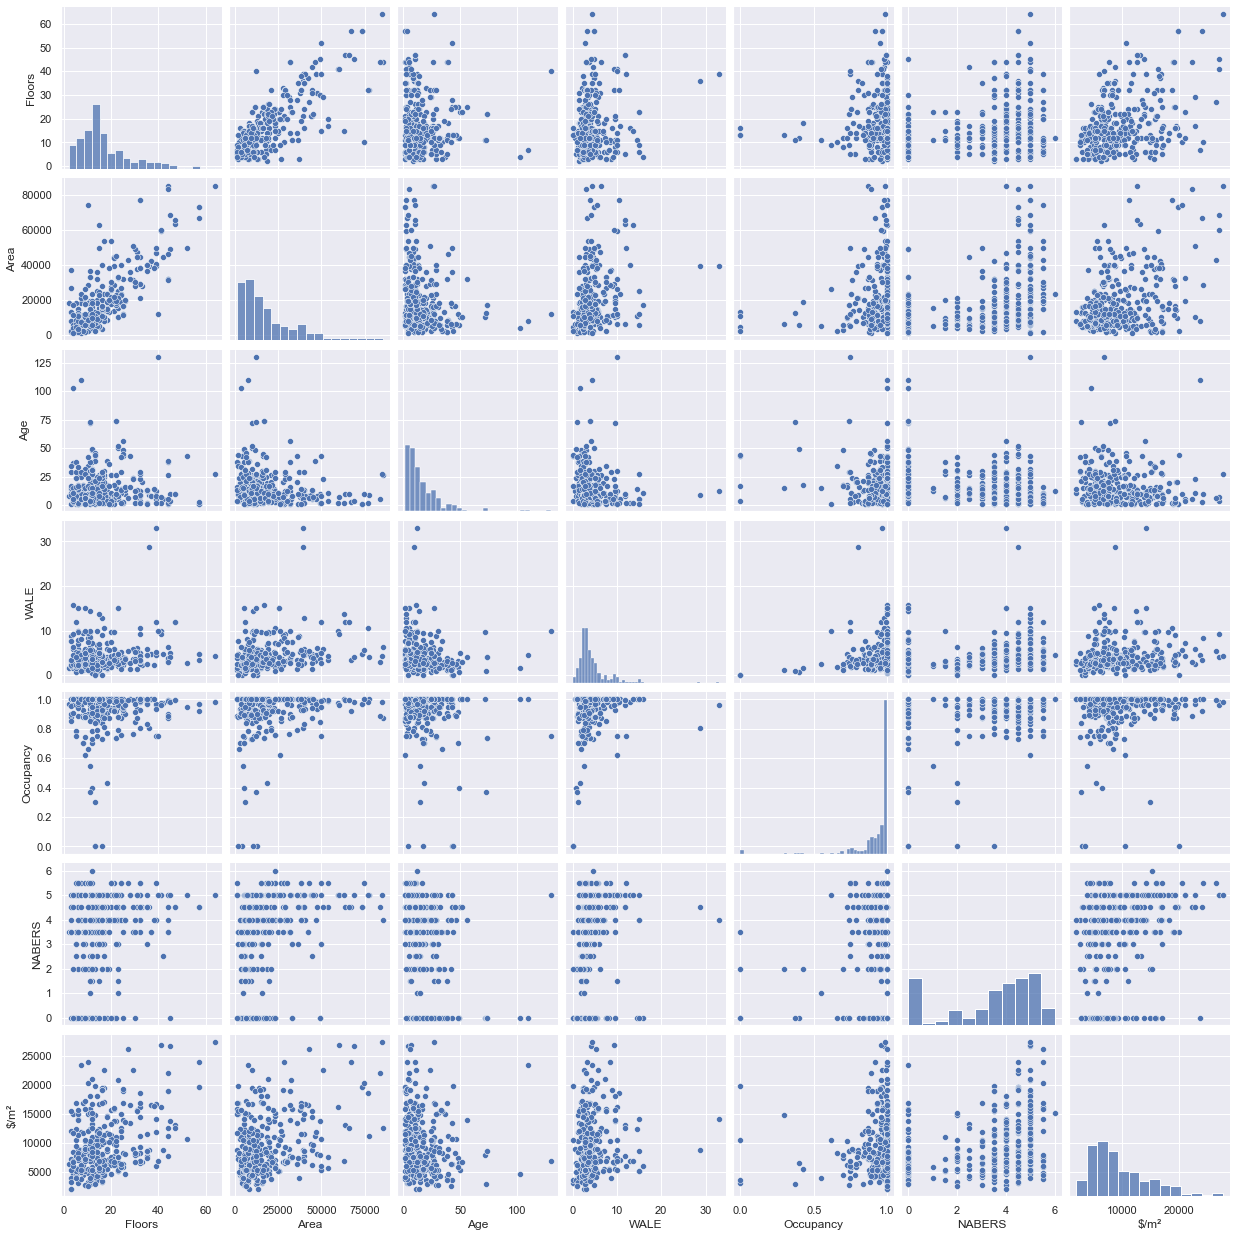

In [34]:
#scatterplot
sns.set()
cols = ['Floors', 'Area', 'Age', 'WALE', 'Occupancy', 'NABERS','$/m²']
sns.pairplot(df[cols], height = 2.5)
plt.show()

some vars need transformation

array([[<AxesSubplot:title={'center':'Floors'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'WALE'}>,
        <AxesSubplot:title={'center':'Occupancy'}>,
        <AxesSubplot:title={'center':'NABERS'}>],
       [<AxesSubplot:title={'center':'$/m²'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

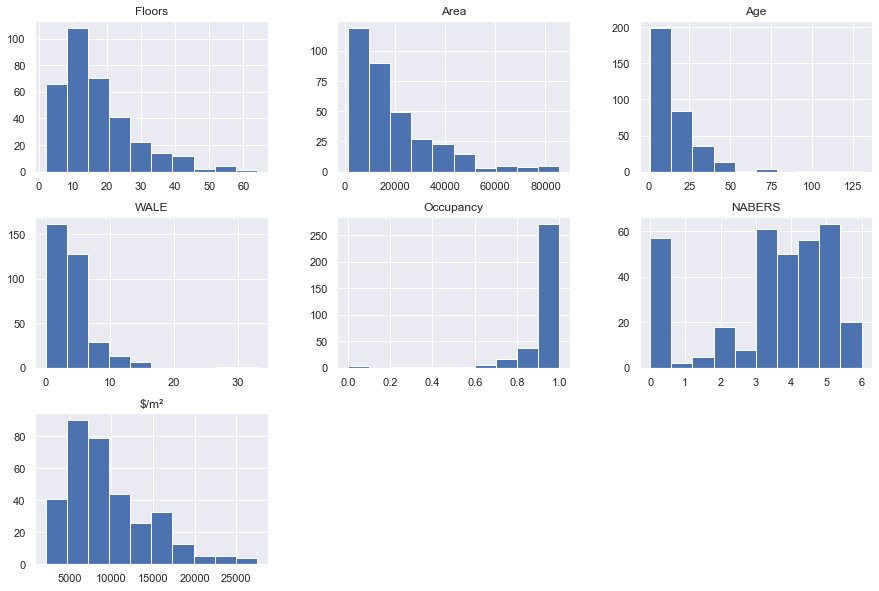

In [35]:
df[cols].hist(figsize=(15, 10))

In [36]:
#(df.sort_values(by=['Occupancy'])).head(50)

- we need to log transform most of the vars
- Occupancy is tricky because it's mostly ones
- Adding a small amount to zero WALEs made the distribution resemble normal

In [37]:
df['WALE_transf'] = df['WALE'].replace(0, 0.3)
df['Occupancy_transf'] = df['Occupancy'].replace(0, 0.01)

In [38]:
cols2 = ['Floors', 'Area', 'Age', 'WALE_transf', 'Occupancy_transf', '$/m²']

# take logarithms of vars
logged_vars = np.log(df[cols2])
#add prefix to var names
logged_vars = logged_vars.add_prefix('ln_')

array([[<AxesSubplot:title={'center':'ln_Floors'}>,
        <AxesSubplot:title={'center':'ln_Area'}>],
       [<AxesSubplot:title={'center':'ln_Age'}>,
        <AxesSubplot:title={'center':'ln_WALE_transf'}>],
       [<AxesSubplot:title={'center':'ln_Occupancy_transf'}>,
        <AxesSubplot:title={'center':'ln_$/m²'}>]], dtype=object)

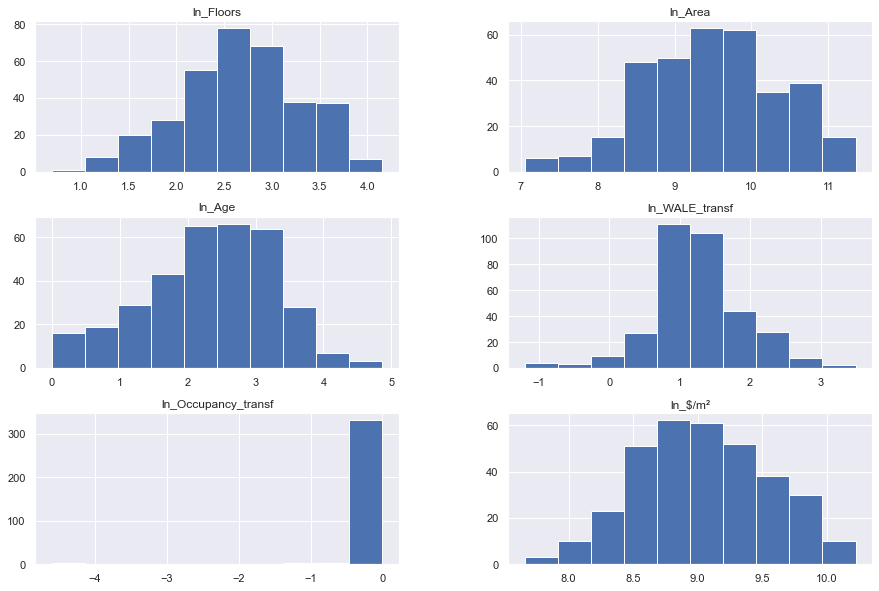

In [39]:
logged_vars.hist(figsize=(15, 10))

<AxesSubplot:>

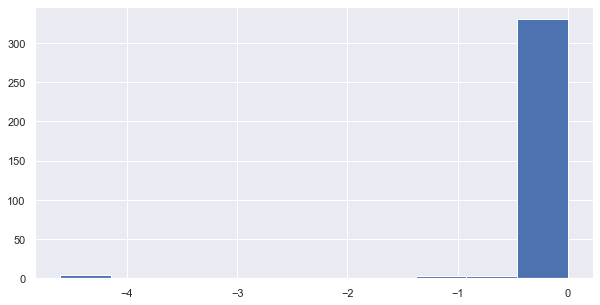

In [40]:
logged_vars['ln_Occupancy_transf'].hist(figsize=(10, 5))

In [41]:
# add logged vars back to the dataset
#df = pd.concat([df, logged_vars], axis=1)